In [1]:
import tensorflow as tf
from tensorflow.keras import layers

2024-11-27 08:27:15.531137: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-27 08:27:15.540260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732675335.550493  200172 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732675335.553433  200172 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 08:27:15.564505: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
model = tf.keras.Sequential([
    layers.Input(shape=(32,32,3)),
    
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),

    layers.Dense(10, activation='softmax')
])

2024-11-27 08:27:16.562467: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-11-27 08:27:16.562481: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: shailesh-aiml
2024-11-27 08:27:16.562484: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: shailesh-aiml
2024-11-27 08:27:16.562532: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 550.127.8
2024-11-27 08:27:16.562539: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 550.127.8
2024-11-27 08:27:16.562541: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 550.127.8


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        36,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,458 (142.41 KB)

 Trainable params: 36,458 (142.41 KB)

 Non-trainable params: 0 (0.00 B)

# CNN in MNIST Data

In [4]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Visualization

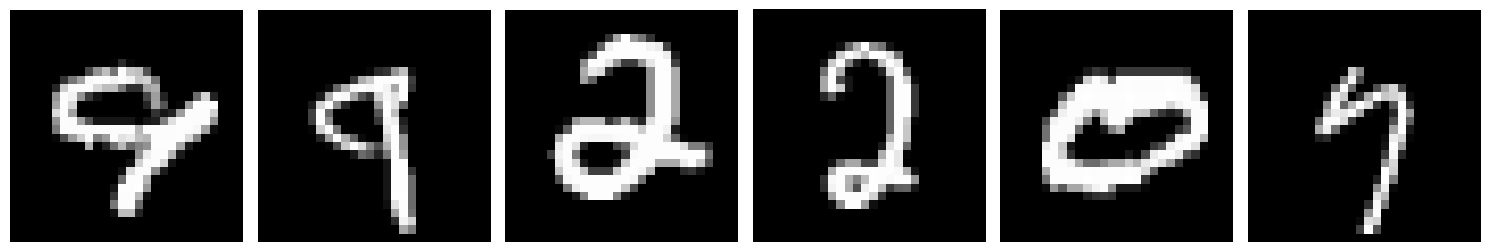

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Select 6 images (you can choose specific indices if needed)
indices = np.random.choice(len(X_train), 6, replace=False)
selected_images = [X_train[i] for i in indices]

# Create subplots
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Plot each image
for ax, img in zip(axes, selected_images):
    ax.imshow(img, cmap='gray')  # Display image in grayscale
    ax.axis('off')  # Turn off axes for a cleaner look

# Display the plot
plt.tight_layout()
plt.show()


In [7]:
# Data Preprocessing

X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)

# Normalization Image Data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [8]:
inp_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

In [19]:
# Define Model
model = Sequential()
model.add(Input(shape=inp_shape))

model.add(Conv2D(32, (3,3), activation='leaky_relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)

In [21]:
# Define loss and optimizer
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
60000*0.8


48000.0

In [27]:
# Train / Fit the model
hist = model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=1,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0336 - val_accuracy: 0.9870 - val_loss: 0.0553
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9911 - loss: 0.0266 - val_accuracy: 0.9879 - val_loss: 0.0560
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9921 - loss: 0.0237 - val_accuracy: 0.9879 - val_loss: 0.0548
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9920 - loss: 0.0226 - val_accuracy: 0.9864 - val_loss: 0.0576
Epoch 5/10
152/375 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9915 - loss: 0.0224

KeyboardInterrupt: 

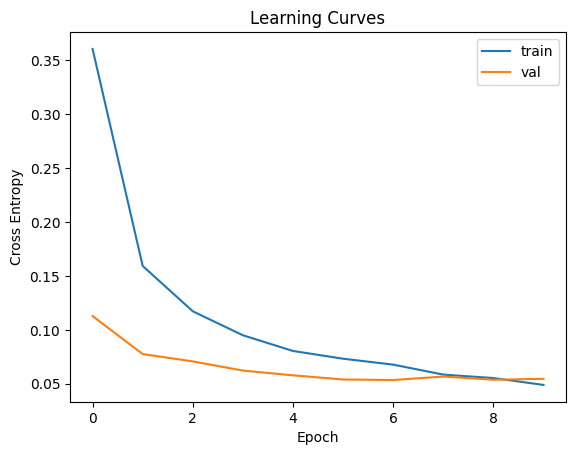

In [23]:
# Plot Learning Curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

In [29]:
loss, acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9837 - loss: 0.0566


In [33]:
pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step


In [34]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [35]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)